In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
pd.options.mode.chained_assignment = None

In [2]:
#aisle = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/aisles.csv')
#departments = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/departments.csv')
#products = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/products.csv')
#orders = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/orders.csv')
#order_products1 = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/order_products__train.csv')
#order_products2 = pd.read_csv('/Users/19459/Documents/Practicum Project/Jyoti dump/order_products__prior.csv')

In [2]:
aisle = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/aisles.csv')
departments = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/departments.CSV')
products = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/products.CSV')
orders = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/orders.CSV')
order_products1 = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/order_products__prior.CSV')
order_products2 = pd.read_csv('/Users/abhinavsharma/Documents/Jyoti MSBA/Data/Full/order_products__train.CSV')

In [3]:
aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
counts = order_products2['reordered'].value_counts()

In [5]:
print(counts)

reordered
1    828824
0    555793
Name: count, dtype: int64


In [6]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
order_products1.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
order_products2.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
order_products2.shape

(1384617, 4)

In [12]:
print("aisle: ",aisle.shape)
print("departments: ",departments.shape)
print("orders: ",orders.shape)
print("products: ",products.shape)
print("order_products1: ",order_products1.shape)
print("order_products2: ",order_products2.shape)

aisle:  (134, 2)
departments:  (21, 2)
orders:  (3421083, 7)
products:  (49688, 4)
order_products1:  (32434489, 4)
order_products2:  (1384617, 4)


In [13]:
# Join Product, Departments and Aisle Data Frame to product_all data frame
product_aisle  = products.merge(aisle, left_on="aisle_id", right_on="aisle_id")
product_all = product_aisle.merge(departments, left_on="department_id", right_on="department_id")
product_all = product_all.drop(columns=["aisle_id","department_id"])
product_all = product_all[['product_id', 'product_name', 'department','aisle', ]]
product_all.head()

,product_id,product_name,department,aisle
0,1,Chocolate Sandwich Cookies,snacks,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,snacks,cookies cakes
2,102,Danish Butter Cookies,snacks,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,snacks,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,snacks,cookies cakes


In [14]:
# Join Order_Products with product_all
order_products = order_products1.merge(product_all,left_on="product_id", right_on="product_id")
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department,aisle
0,2,33120,1,1,Organic Egg Whites,dairy eggs,eggs
1,26,33120,5,0,Organic Egg Whites,dairy eggs,eggs
2,120,33120,13,0,Organic Egg Whites,dairy eggs,eggs
3,327,33120,5,1,Organic Egg Whites,dairy eggs,eggs
4,390,33120,28,1,Organic Egg Whites,dairy eggs,eggs


In [15]:
market_basket = order_products.merge(orders, left_on="order_id",right_on="order_id")
market_basket.sample(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
17125762,510038,5025,3,1,Green Onions,produce,fresh vegetables,6499,prior,2,6,15,7.0
14385809,2479638,46802,7,0,Pineapple Chunks,frozen,frozen produce,184325,prior,4,0,18,9.0
17716999,1118761,30391,8,1,Organic Cucumber,produce,fresh vegetables,116845,prior,27,1,6,4.0
1981767,1709496,32655,4,1,Organic Large Grade AA Brown Eggs,dairy eggs,eggs,47427,prior,26,2,16,7.0
12042893,1563541,28476,11,1,Organic Small Curd Cottage Cheese,dairy eggs,other creams cheeses,137379,prior,12,6,16,13.0


In [16]:
market_basket.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,dairy eggs,eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,produce,fresh vegetables,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,pantry,spices seasonings,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,pantry,oils vinegars,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,pantry,baking ingredients,202279,prior,3,5,9,8.0


In [17]:
market_basket = market_basket[['user_id','order_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order','product_name', 'add_to_cart_order', 'reordered',
    'department', 'aisle' ]]

market_basket.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,add_to_cart_order,reordered,department,aisle
0,202279,2,3,5,9,8.0,Organic Egg Whites,1,1,dairy eggs,eggs
1,202279,2,3,5,9,8.0,Michigan Organic Kale,2,1,produce,fresh vegetables
2,202279,2,3,5,9,8.0,Garlic Powder,3,0,pantry,spices seasonings
3,202279,2,3,5,9,8.0,Coconut Butter,4,1,pantry,oils vinegars
4,202279,2,3,5,9,8.0,Natural Sweetener,5,0,pantry,baking ingredients


In [17]:
#converting number of day to name

market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Sunday" if x==0 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Monday" if x==1 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Tuesday" if x==2 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Wednesday" if x==3 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Thursday" if x==4 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Friday" if x==5 else x)
market_basket["order_dow"] = market_basket["order_dow"].apply(lambda x:"Saturday" if x==6 else x)

In [18]:
#Saving result data frame as a Pickle File
#market_basket.to_pickle("MarketBasketInitialPickle")

In [19]:
#Reading market basket initial from Pickle File as a data frame
# market_basket = pd.read_pickle("MarketBasketInitialPickle")

In [18]:
market_basket.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,add_to_cart_order,reordered,department,aisle
0,202279,2,3,5,9,8.0,Organic Egg Whites,1,1,dairy eggs,eggs
1,202279,2,3,5,9,8.0,Michigan Organic Kale,2,1,produce,fresh vegetables
2,202279,2,3,5,9,8.0,Garlic Powder,3,0,pantry,spices seasonings
3,202279,2,3,5,9,8.0,Coconut Butter,4,1,pantry,oils vinegars
4,202279,2,3,5,9,8.0,Natural Sweetener,5,0,pantry,baking ingredients


In [19]:
# Explore distribution of order_dow (day of the week)
print(market_basket['order_dow'].value_counts())

# Explore distribution of order_hour_of_day
print(market_basket['order_hour_of_day'].value_counts())

# Explore distribution of days_since_prior_order
print(market_basket['days_since_prior_order'].value_counts())

order_dow
0    6209666
1    5665856
6    4500304
2    4217798
5    4209533
3    3844117
4    3787215
Name: count, dtype: int64
order_hour_of_day
10    2764426
11    2738582
14    2691548
15    2664533
13    2663292
12    2620847
16    2537458
9     2456713
17    2089465
8     1719973
18    1637923
19    1259401
20     977038
7      891937
21     796370
22     634734
23     402620
6      290795
0      218948
1      115786
5       88062
2       69434
4       53283
3       51321
Name: count, dtype: int64
days_since_prior_order
7.0     3479504
30.0    3070057
6.0     2519939
5.0     2126420
4.0     2080560
8.0     1933815
3.0     1877881
2.0     1464875
9.0     1218973
14.0    1030605
10.0     968153
1.0      941116
13.0     851878
11.0     821515
12.0     774869
15.0     672080
16.0     461801
0.0      448698
21.0     444557
17.0     382465
20.0     380077
18.0     350907
19.0     335165
22.0     309118
28.0     253349
23.0     226030
27.0     204251
24.0     193590
25.0     180584
26.0  

In [20]:
order_products1.head()
len(order_products1)

32434489

In [21]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [22]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department,aisle
0,2,33120,1,1,Organic Egg Whites,dairy eggs,eggs
1,26,33120,5,0,Organic Egg Whites,dairy eggs,eggs
2,120,33120,13,0,Organic Egg Whites,dairy eggs,eggs
3,327,33120,5,1,Organic Egg Whites,dairy eggs,eggs
4,390,33120,28,1,Organic Egg Whites,dairy eggs,eggs


In [23]:
len(order_products)

32434489

In [24]:
#Creating a merged dataset for orders_prior data 
#order_products_p2 = order_products1.merge(products, on ='product_id', how='left', suffixes=('_order', '_product'))
#order_products_prior = order_products.merge(aisle, on ='aisle_id', how='left')
#order_products_p2 = order_products_p2.merge(departments, on ='department_id', how='left')
order_products_prior = order_products.merge(orders, on='order_id', how='left')
order_products_prior.shape

(32434489, 13)

In [25]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,dairy eggs,eggs,202279,prior,3,5,9,8.0
1,26,33120,5,0,Organic Egg Whites,dairy eggs,eggs,153404,prior,2,0,16,7.0
2,120,33120,13,0,Organic Egg Whites,dairy eggs,eggs,23750,prior,11,6,8,10.0
3,327,33120,5,1,Organic Egg Whites,dairy eggs,eggs,58707,prior,21,6,9,8.0
4,390,33120,28,1,Organic Egg Whites,dairy eggs,eggs,166654,prior,48,0,12,9.0


In [26]:
order_products_prior.user_id.nunique()

206209

In [27]:
order_products_prior.isnull().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
department                      0
aisle                           0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
dtype: int64

In [28]:
cross_df = pd.crosstab(order_products_prior.user_id, order_products_prior.aisle)
cross_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [29]:
cross_df.tail()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
206205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
206206,0,4,0,0,0,0,4,1,0,0,...,1,0,0,0,0,1,0,1,0,0
206207,0,0,0,0,1,0,0,0,0,0,...,3,4,0,2,1,0,0,11,0,15
206208,0,3,0,0,3,0,4,0,0,0,...,5,0,0,7,0,0,0,0,0,33
206209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3


In [30]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.081081


In [31]:
df.shape

(206209, 134)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.113443,0.039084,-0.042863,0.018865,-0.088337,-0.104603,-0.116436,0.083747,-0.061683,-0.025919
1,-0.036988,0.108884,-0.066406,-0.123271,0.098851,-0.033966,-0.054745,-0.053313,-0.020354,-0.008426
2,0.064282,0.103962,0.000710,-0.012222,-0.046979,0.112219,-0.029826,0.007929,0.012513,0.001594
3,-0.093210,0.054093,0.001867,-0.003974,-0.071356,-0.019262,-0.025135,-0.038268,0.006086,-0.000569
4,0.094629,-0.037051,-0.024952,-0.021575,0.055370,0.107650,-0.008038,0.103929,0.051698,-0.025778


In [33]:
print("Variance explained by each principal component:", pca.explained_variance_ratio_)

Variance explained by each principal component: [0.14354181 0.09937617 0.07049654 0.05219392 0.0407219  0.03321594
 0.03003237 0.02783646 0.02103619 0.02058167]


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
#silhouette_scores = []

K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)
    #labels = km.labels_
    #silhouette_scores.append(silhouette_score(df_pca, labels))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

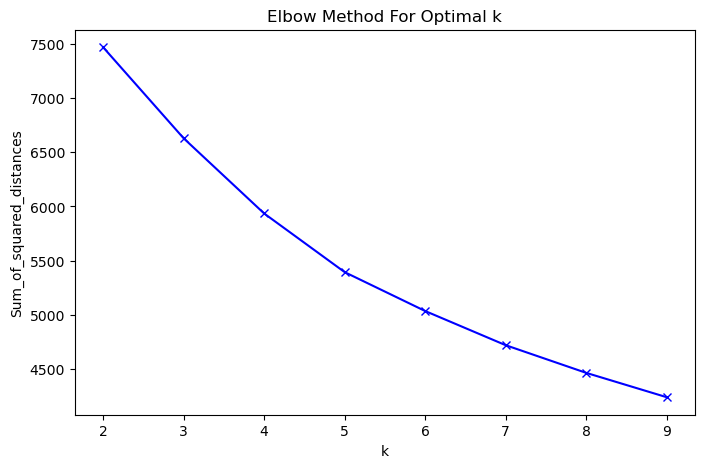

In [42]:
plt.subplots(figsize = (8, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
### Plot the Silhouette Scores
# plt.subplots(figsize=(8, 5))
# plt.plot(K, silhouette_scores, 'bo-')
# plt.xlabel('k')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Scores for Various k')
# plt.show()

In [43]:
clusterer = KMeans(n_clusters=5,random_state=42).fit(df_pca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df_pca)
print(centers)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-1.98272709e-01  1.61722609e-02  3.17199955e-01 -3.14073986e-02
   1.87304006e-02  6.17086087e-04  4.08069956e-03  1.08892138e-02
   1.16146947e-03 -3.85195074e-03]
 [-7.38885874e-02 -1.05624483e-02 -2.70104885e-02 -7.01249653e-03
  -6.74869755e-03  1.54806864e-03  5.01320454e-04 -2.53144356e-03
  -3.21541422e-04 -4.06707572e-04]
 [ 1.05523556e-01 -7.30516255e-02  1.72449298e-02  3.66659393e-03
   1.76619102e-03 -4.42331553e-03 -9.44940594e-04  1.29734524e-03
  -1.70959368e-04  7.67498052e-04]
 [-6.14576086e-03  1.30681530e-01  4.86043199e-03  2.30150247e-01
   1.10160811e-01 -2.27761580e-02  9.14608287e-05 -6.40254600e-03
   7.79201521e-03  3.05104637e-03]
 [ 6.76302555e-02  1.05966453e-01 -1.10898363e-03 -3.09412357e-02
  -1.07628366e-02  7.18301298e-03 -5.22937422e-04  4.51275861e-03
  -7.09267568e-04 -1.57108995e-04]]


In [53]:
temp_df = df_pca.iloc[:, 0:3]
temp_df.columns = ["pc1", "pc2", "pc3"]
temp_df['cluster'] = c_preds
temp_df.head()

,pc1,pc2,pc3,cluster
0,-0.113443,0.039084,-0.042863,1
1,-0.036988,0.108884,-0.066406,4
2,0.064282,0.103962,0.000710,4
3,-0.093210,0.054093,0.001867,1
4,0.094629,-0.037051,-0.024952,2


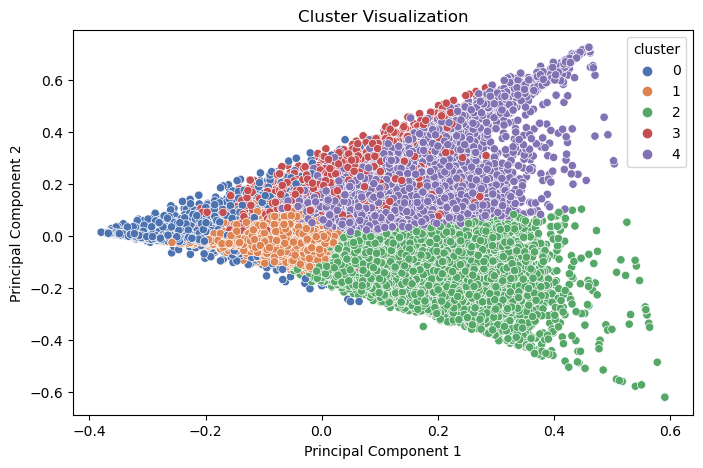

In [51]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster",palette='deep')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

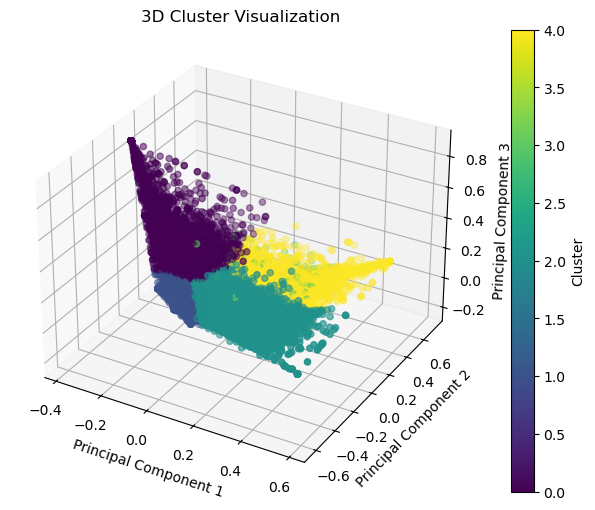

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Assuming temp_df is your DataFrame and it includes 'pc1', 'pc2', 'pc3', and 'cluster' columns

# Create a figure for 3D plotting
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using Matplotlib with a colormap
# Use 'viridis' or any other valid colormap from the list provided in the error
scatter = ax.scatter(
    temp_df['pc1'], 
    temp_df['pc2'], 
    temp_df['pc3'],  # Third dimension
    c=temp_df['cluster'],  # Color by cluster
    cmap='viridis',        # Valid colormap
)

# Create a color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')

# Add labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Cluster Visualization")

# Show the plot
plt.show()


In [61]:
cross_df['cluster'] = c_preds

cluster1 = cross_df[cross_df.cluster == 0]
cluster2 = cross_df[cross_df.cluster == 1]
cluster3 = cross_df[cross_df.cluster == 2]
cluster4 = cross_df[cross_df.cluster == 3]
cluster5 = cross_df[cross_df.cluster == 4]

In [79]:
# Define a function to prepare cluster data
def prepare_cluster_data(cluster):
    # Drop 'cluster' column, compute mean, sort and get the top 10
    result = cluster.drop('cluster', axis=1).mean().sort_values(ascending=False).head(10)
    # Convert to DataFrame for nicer display
    result_df = pd.DataFrame(result).rename(columns={0: 'Mean'})
    return result_df

# Prepare data for each cluster
cluster1_data = prepare_cluster_data(cluster1)
cluster2_data = prepare_cluster_data(cluster2)
cluster3_data = prepare_cluster_data(cluster3)
cluster4_data = prepare_cluster_data(cluster4)
cluster5_data = prepare_cluster_data(cluster5)

# Display each cluster's data as a separate table
print("Cluster 1 Top 10 Means:")
display(cluster1_data)  # Using display() for nicer formatting in Jupyter Notebook
print("\nCluster 2 Top 10 Means:")
display(cluster2_data)
print("\nCluster 3 Top 10 Means:")
display(cluster3_data)
print("\nCluster 4 Top 10 Means:")
display(cluster4_data)
print("\nCluster 5 Top 10 Means:")
display(cluster5_data)


Cluster 1 Top 10 Means:


,Mean
aisle,
water seltzer sparkling water,20.950683
fresh fruits,3.336535
soft drinks,2.800702
yogurt,2.254895
energy granola bars,1.557074
chips pretzels,1.346694
milk,1.327484
tea,1.327115
packaged vegetables fruits,1.251201



Cluster 2 Top 10 Means:


,Mean
aisle,
fresh fruits,9.778703
fresh vegetables,7.575389
yogurt,7.225815
packaged vegetables fruits,6.003217
packaged cheese,4.931539
chips pretzels,4.482814
milk,4.255355
water seltzer sparkling water,4.091677
refrigerated,3.257564



Cluster 3 Top 10 Means:


,Mean
aisle,
fresh vegetables,37.034432
fresh fruits,21.751276
packaged vegetables fruits,12.029275
yogurt,6.161955
packaged cheese,5.020251
fresh herbs,4.150316
milk,4.004458
soy lactosefree,3.705742
frozen produce,3.302870



Cluster 4 Top 10 Means:


,Mean
aisle,
packaged produce,18.358374
fresh fruits,10.874670
packaged vegetables fruits,4.242733
fresh vegetables,3.108846
water seltzer sparkling water,1.714861
milk,1.615075
packaged cheese,1.548761
frozen produce,1.145086
chips pretzels,1.139172



Cluster 5 Top 10 Means:


,Mean
aisle,
fresh fruits,35.758131
fresh vegetables,15.027136
packaged vegetables fruits,12.095226
yogurt,9.876873
milk,5.956113
packaged cheese,5.111713
soy lactosefree,3.776706
water seltzer sparkling water,3.613206
bread,3.195868


In [62]:
cluster1.shape

(5414, 135)

In [63]:
cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
water seltzer sparkling water    20.950683
fresh fruits                      3.336535
soft drinks                       2.800702
yogurt                            2.254895
energy granola bars               1.557074
chips pretzels                    1.346694
milk                              1.327484
tea                               1.327115
packaged vegetables fruits        1.251201
soy lactosefree                   1.082564
dtype: float64

In [64]:
cluster2.shape

(99152, 135)

In [65]:
cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh fruits                     9.778703
fresh vegetables                 7.575389
yogurt                           7.225815
packaged vegetables fruits       6.003217
packaged cheese                  4.931539
chips pretzels                   4.482814
milk                             4.255355
water seltzer sparkling water    4.091677
refrigerated                     3.257564
ice cream ice                    3.098455
dtype: float64

In [66]:
cluster3.shape

(55849, 135)

In [67]:
cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 37.034432
fresh fruits                     21.751276
packaged vegetables fruits       12.029275
yogurt                            6.161955
packaged cheese                   5.020251
fresh herbs                       4.150316
milk                              4.004458
soy lactosefree                   3.705742
frozen produce                    3.302870
water seltzer sparkling water     3.080288
dtype: float64

In [68]:
cluster4.shape

(7947, 135)

In [69]:
cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
packaged produce                 18.358374
fresh fruits                     10.874670
packaged vegetables fruits        4.242733
fresh vegetables                  3.108846
water seltzer sparkling water     1.714861
milk                              1.615075
packaged cheese                   1.548761
frozen produce                    1.145086
chips pretzels                    1.139172
nuts seeds dried fruit            1.033220
dtype: float64

In [70]:
cluster5.shape

(37847, 135)

In [72]:
cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh fruits                     35.758131
fresh vegetables                 15.027136
packaged vegetables fruits       12.095226
yogurt                            9.876873
milk                              5.956113
packaged cheese                   5.111713
soy lactosefree                   3.776706
water seltzer sparkling water     3.613206
bread                             3.195868
chips pretzels                    3.128887
dtype: float64